# Customer Churn Prediction and Retention Strategy

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

#### Load and Explore the Dataset

In [88]:
dataset = pd.read_csv("Telco-Customer-Churn.csv")

In [89]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
dataset.shape

(7043, 21)

In [91]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [92]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [93]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [94]:
dataset["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

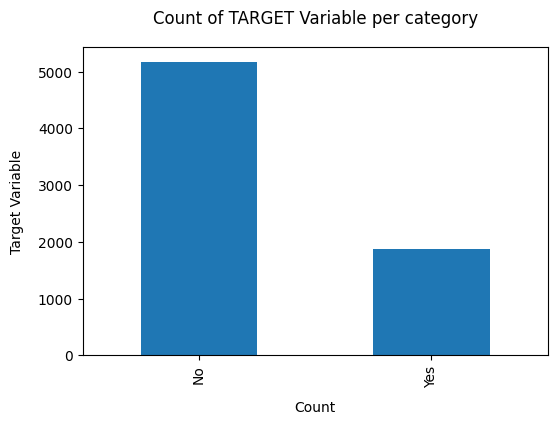

In [95]:
dataset["Churn"].value_counts().plot(kind="bar", figsize=(6,4))
plt.xlabel("Count",labelpad=10)
plt.ylabel("Target Variable", labelpad=10)
plt.title("Count of TARGET Variable per category", y=1.05);
plt.show()

In [96]:
100*dataset["Churn"].value_counts()/len(dataset["Churn"])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

### Data is highly imbalanced, ratio = 73:27
##### So we analyse the data with other features while taking the target values separately to get some insights.

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Churn: Target variable (Yes/No)

##### tenure, MonthlyCharges, TotalCharges: Numeric

##### Others: Categorical like Contract, PaymentMethod, etc.

## Data Cleaning

#### Remove customerID as it's not useful

In [98]:
dataset.drop("customerID", axis=1, inplace=True)

In [99]:
dataset.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### Total Charges should be numeric amount. Let's convert it to numerical data type

In [100]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [101]:
# Check for nulls
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### It fills missing values (NaN) in the 'TotalCharges' column with the mean (average) of that column.

In [102]:
dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean(), inplace=True)

C:\Users\A8894\AppData\Local\Temp\ipykernel_10748\4072990652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean(), inplace=True)


In [103]:
# Check for nulls
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analysis (EDA)

In [104]:
dataset["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

#### Target variable distribution

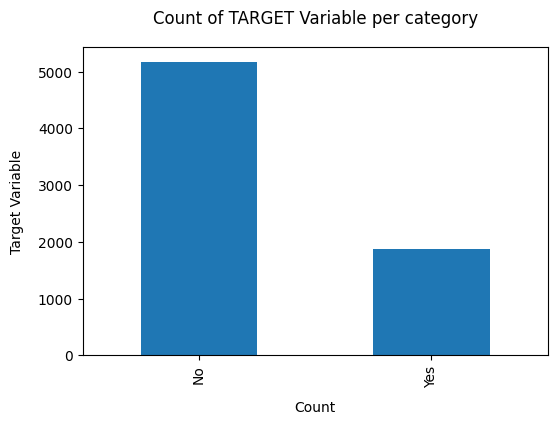

In [105]:
dataset["Churn"].value_counts().plot(kind="bar", figsize=(6,4))
plt.xlabel("Count",labelpad=10)
plt.ylabel("Target Variable", labelpad=10)
plt.title("Count of TARGET Variable per category", y=1.05);
plt.show()

#### Monthly Charges vs Churn

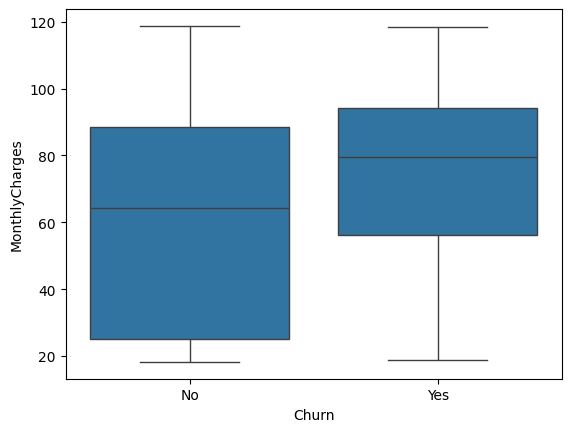

In [106]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=dataset)
plt.show()

#### Contract type vs Churn

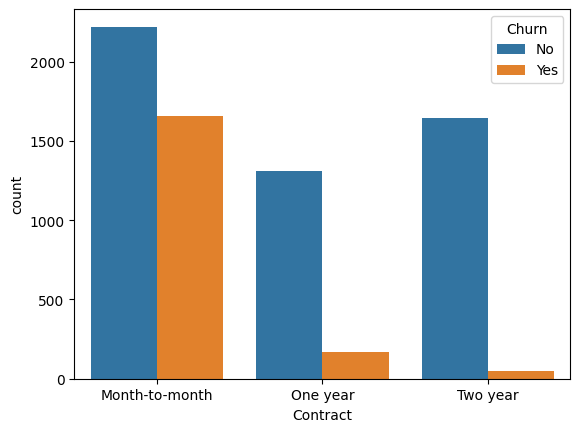

In [107]:
sns.countplot(x='Contract', hue='Churn', data=dataset)
plt.show()

## Encode Categorical Variables

#### Convert 'Yes'/'No' to 1/0 for Churn

In [108]:
dataset['Churn'] = dataset['Churn'].map({'Yes': 1, 'No': 0})

In [109]:
dataset.sample(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6246,Male,0,No,No,54,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Bank transfer (automatic),65.30,3512.90,0
1495,Female,0,Yes,Yes,52,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),98.15,4993.40,0
147,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.65,45.65,1
6057,Male,0,No,No,19,Yes,No,DSL,No,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),61.55,1093.20,0
5057,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.85,724.65,0
5646,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.25,19.25,1
3414,Female,0,No,No,47,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,No,Mailed check,41.90,1875.25,0


#### One-hot encode other categorical columns

In [110]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [111]:
dataset.head(8)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
5,0,8,99.65,820.50,1,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
7,0,10,29.75,301.90,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


## Feature Scaling

In [113]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [116]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
dataset[num_cols] = scaler.fit_transform(dataset[num_cols])

In [118]:
dataset.head(7)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994971,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173876,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.960399,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.195400,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.941193,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
5,0,-0.992402,1.159546,-0.645874,1,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
6,0,-0.422317,0.808907,-0.147428,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False


## Train-Test Split

In [121]:
from sklearn.model_selection import train_test_split

In [123]:
X = data.drop('Churn', axis=1) #This removes the 'Churn' column from data and assigns the rest to X.
                                #So, X now contains all input features (like gender, tenure, internet service, etc.)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and Train Models

#### 1. Logistic Regression (Baseline)

In [126]:
from sklearn.linear_model import LogisticRegression

In [133]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [134]:
predictions = logmodel.predict(X_test)

In [135]:
predictions

array([1, 0, 0, ..., 0, 0, 0], shape=(1409,))

In [136]:
np.array(y_test)

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

#### Let's move on to evaluate our model!

In [141]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [145]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Logistic Regression Accuracy: 0.8211497515968772
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



#### 2. Random Forest (Improved)

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [160]:
y_pred_rf = rf_model.predict(X_test)

In [161]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7927608232789212
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [147]:
cm = confusion_matrix(y_test, y_pred_rf)

array([[943,  93],
       [199, 174]])

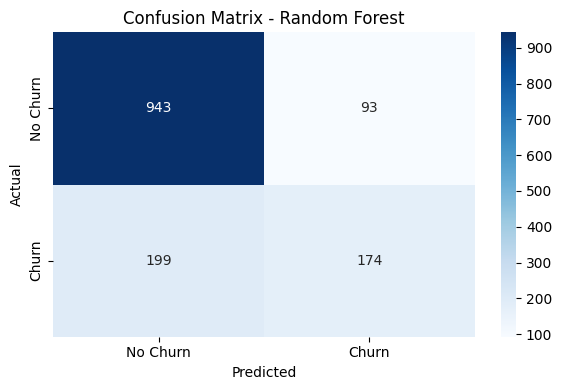

In [155]:
# Create a heatmap

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

## Importance Feature 

Text(0.5, 1.0, 'Top 10 Important Features')

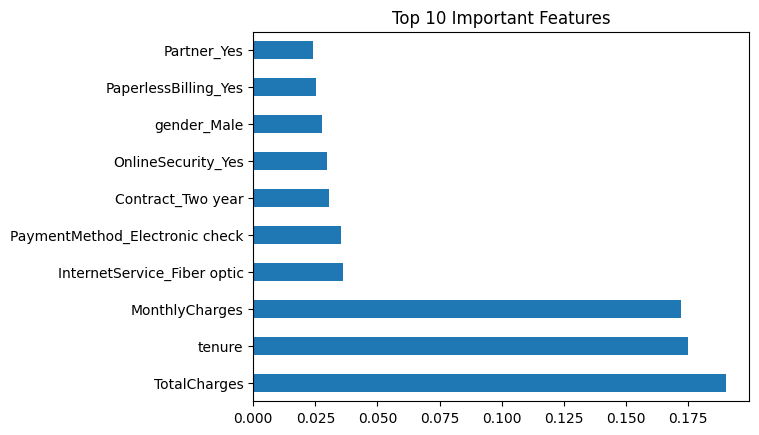

In [156]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")